# 线性回归

## 单变量线性回归

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.读入数据

In [284]:
data = pd.read_csv("ex1data1.txt",names=["population","profit"])
data.head()#看前5个数据

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [285]:
data.tail()#看后五个数据

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [286]:
data.info()#看一下数据的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [287]:
data.describe()#看数据的方差均值等

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### 2.可视化数据

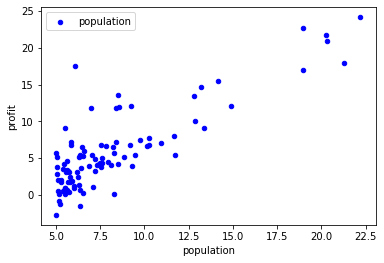

In [288]:
data.plot.scatter("population","profit",c="b",label="population")
plt.show()

### 3.准备数据

In [289]:
data.insert(0,"ones",1)#插入第一列
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [290]:
cols = data.shape[1]#计算列数
X = data.iloc[:,0:cols-1]
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [291]:
y = data.iloc[:,cols-1:cols]
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


转化为numpy矩阵

In [292]:
X=np.matrix(X.values)
y=np.matrix(y.values)
theta = np.matrix(np.zeros((2,1)))

In [293]:
X.shape

(97, 2)

In [294]:
theta.shape

(2, 1)

In [295]:
y.shape

(97, 1)

### 4.代价函数

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [296]:
def computeCost(X,y,theta):
    inner = np.power((X@theta)-y,2)
    return np.sum(inner)/(2*len(X))

In [297]:
computeCost(X,y,theta)

32.072733877455676

### 5.梯度下降

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
$$\theta_j=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}{((h_\theta(x^i)-y^i)x_j^i)}$$

In [298]:
def grandientDecent(X,y,theta,alpha,iters):
    costs=[]
    for i in range(iters):
        theta = theta - alpha*(X.T)@(X@theta-y)/len(X)
        cost = computeCost(X,y,theta)
        costs.append(cost)
    return theta,costs

In [299]:
alpha = 0.02
iters =2000
theta,costs = grandientDecent(X,y,theta,alpha,iters)
theta

matrix([[-3.8928815 ],
        [ 1.19274237]])

In [300]:
computeCost(X,y,theta)

4.476972141289017

### 6.可视化数据，绘制得到的代价函数

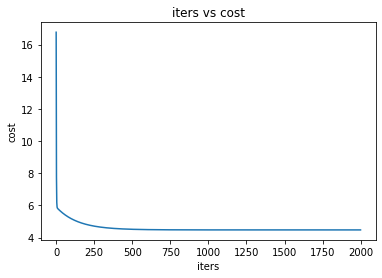

In [301]:
fig,ax=plt.subplots()
ax.plot(np.arange(iters),costs)
ax.set(xlabel="iters",ylabel="cost",title="iters vs cost")
plt.show()

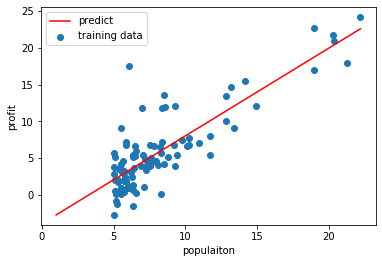

In [302]:
x=np.linspace(X.min(),X.max(),100)
y_=theta[0,0]+theta[1,0]*x

fig,ax=plt.subplots()
#绘制散点图
ax.scatter(data.population,data.profit,label='training data')
ax.plot(x,y_,"r",label='predict')
ax.legend()
ax.set(xlabel='populaiton',
      ylabel='profit')
plt.show()

# 多变量线性回归

In [343]:
data2 = pd.read_csv("ex1data2.txt",names=['size','num','price'])
data2.head()

,size,num,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


进行归一化处理（正态分布）：
$$x=\frac{x-u}{s}$$
u=均值，s=标准差

In [363]:
data2 = (data2-data2.mean())/data2.std()
data2.head()

,ones,size,num,price
0,NaN,0.130010,-0.223675,0.475747
1,NaN,-0.504190,-0.223675,-0.084074
2,NaN,0.502476,-0.223675,0.228626
3,NaN,-0.735723,-1.537767,-0.867025
4,NaN,1.257476,1.090417,1.595389


预处理数据

In [345]:
data2.insert(0,'ones',1)
data2.head()

,ones,size,num,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [359]:
cols2=data2.shape[1]
X2 = data2.iloc[:,0:cols2-1]
y2=data2.iloc[:,cols2-1:cols2]

X2=np.matrix(X2.values)
y2=np.matrix(y2.values)
theta2=np.matrix(np.zeros((3,1)))

In [ ]:
计算代价函数和theta

In [360]:
theta2,costs2=grandientDecent(X2,y2,theta2,alpha,iters)
computeCost(X2,y2,theta2)

0.13068648053904205

可视化数据和结果

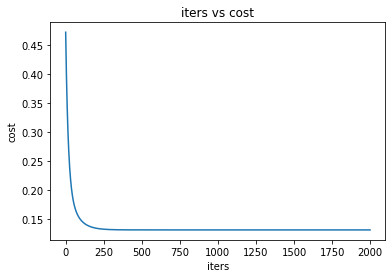

In [364]:
fig,ax=plt.subplots()
ax.plot(np.arange(iters),costs2)
ax.set(xlabel="iters",ylabel="cost22",title="iters vs cost2")
plt.show()

In [366]:
theta2

matrix([[-1.10939257e-16],
        [ 8.84765973e-01],
        [-5.31788053e-02]])

# 正规化方程

正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [369]:
def normoleq(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [370]:
final_theta = normoleq(X,y)
final_theta

matrix([[-3.89578088],
        [ 1.19303364]])